<a href="https://colab.research.google.com/github/sofaemha/archive/blob/main/2025-9/cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import os
import cv2
import random
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [186]:
kaggle_dataset = 'https://www.kaggle.com/datasets/fakhrealam9537/leaf-disease-segmentation-dataset'
kaggle_train_dataset = ''
kaggle_test_dataset = ''
train_directory = 'train'
test_directory = 'test'

In [228]:
def shell(command):
  print(subprocess.run(command, capture_output=True, text=True).stdout)

def kaggle_train():
  shell(['wget', kaggle_train_dataset, '-O', 'train.zip'])
  shell(['unzip', 'train.zip'])
  shell(['mv', 'aug_data', 'train'])
  shell(['rm', '-rf', 'train.zip'])

def kaggle_test():
  shell(['wget', kaggle_test_dataset, '-O', 'test.zip'])
  shell(['unzip', 'test.zip'])
  shell(['mv', 'data', 'test'])
  shell(['rm', '-rf', 'test.zip'])

def image_show(images, labels, column, size):
  plt.subplots(1, column, figsize=((column * size), size))
  for index in range(len(images)):
    plt.subplot(1, len(images), index+1)
    plt.imshow(images[index])
    plt.xlabel(labels[index])
    plt.xticks([])
    plt.yticks([])
  plt.tight_layout()

def hsv_clahe(hsv_image):
    h, s, v = cv2.split(hsv_image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    v_clahe = clahe.apply(v)
    merge = cv2.merge([h, s, v_clahe])
    return merge

def items(array):
  return '\n'.join(list(map(str, array)))

def space():
  print('\n')

def system():
  shell(['rm', '-rf', 'sample_data'])
  shell(['ls', '-la'])

In [57]:
# kaggle_train()
# kaggle_test()
system()

total 28
drwxr-xr-x 1 root root 4096 Sep 28 08:58 .
drwxr-xr-x 1 root root 4096 Sep 28 08:12 ..
drwxr-xr-x 4 root root 4096 Sep 25 13:36 .config
drwxr-xr-x 2 root root 4096 Sep 28 08:23 .ipynb_checkpoints
drwxr-xr-x 4 root root 4096 Aug 13  2021 test
drwxr-xr-x 4 root root 4096 Aug 13  2021 train



In [128]:
train_image_path = os.path.join(train_directory, 'images')
train_mask_path = os.path.join(train_directory, 'masks')
test_image_path = os.path.join(test_directory, 'images')
test_mask_path = os.path.join(test_directory, 'masks')

path_list = [train_image_path, train_mask_path, test_image_path, test_mask_path]
print(items(path_list))

train/images
train/masks
test/images
test/masks


In [129]:
train_image_data = len(os.listdir(train_image_path))
train_mask_data = len(os.listdir(train_mask_path))
test_image_data = len(os.listdir(test_image_path))
test_mask_data = len(os.listdir(test_mask_path))

data_list = [train_image_data, train_mask_data, test_image_data, test_mask_data]
print(items(data_list))

2940
2940
588
588


In [104]:
data_labels = ['Train Images', 'Train Masks', 'Test Images', 'Test Masks']
figure_data_values = [train_image_data, train_mask_data, test_image_data, test_mask_data]
figure_data_labels = [f"{x}\n({y})" for x, y in zip(data_labels, figure_data_values)]

print(figure_data_labels, figure_data_values)

['Train Images\n(2940)', 'Train Masks\n(2940)', 'Test Images\n(588)', 'Test Masks\n(588)'] [2940, 2940, 588, 588]


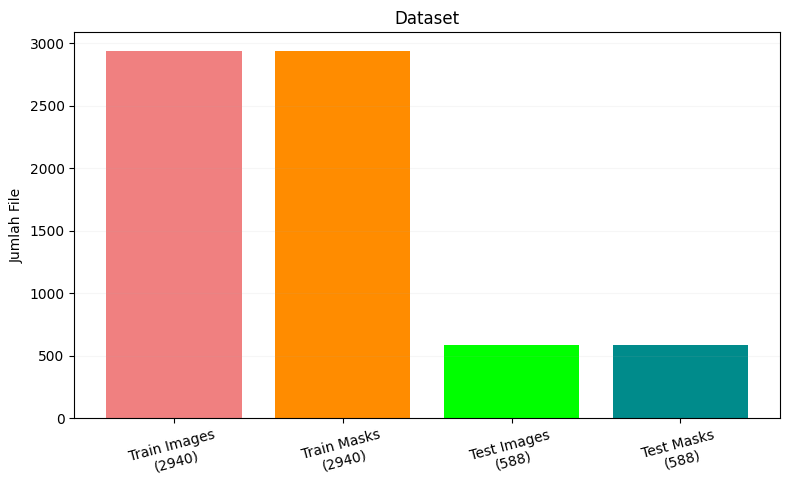

In [247]:
plt.figure(figsize=(8, 5))
plt.bar(figure_data_labels, figure_data_values, color=['lightcoral', 'darkorange', 'lime', 'darkcyan'])
plt.title('Dataset')
plt.ylabel('Jumlah File')
plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(axis='y', alpha=0.1)
plt.show()

In [223]:
sample_file = os.listdir(train_image_path)[random.randint(0, train_image_data-1)]
sample_path = os.path.join(train_image_path, sample_file)

print(sample_path)
space()

print(sample_file)

train/images/00091_2.jpg


00091_2.jpg


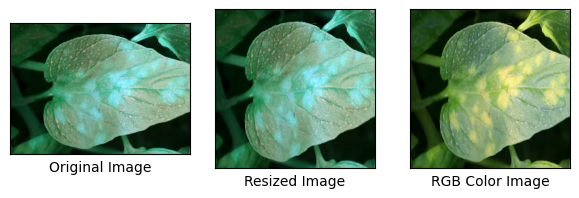

In [248]:
sample_image = cv2.imread(sample_path)
sample_resized = cv2.resize(sample_image, (256, 256))
sample_bgr2rgb = cv2.cvtColor(sample_resized, cv2.COLOR_BGR2RGB)

sample_container = [sample_image, sample_resized, sample_bgr2rgb]
sample_labels = ['Original Image','Resized Image','RGB Color Image']

image_show(sample_container, sample_labels, 3, 2)

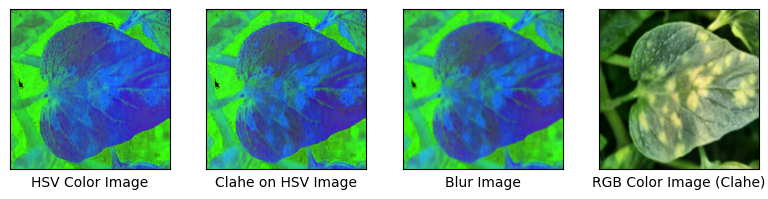

In [249]:
sample_bgr2hsv = cv2.cvtColor(sample_resized, cv2.COLOR_BGR2HSV)
sample_clahe = hsv_clahe(sample_bgr2hsv)
sample_blur = cv2.GaussianBlur(sample_clahe, (5, 5), 0)
sample_hsv2rgb = cv2.cvtColor(sample_blur, cv2.COLOR_HSV2RGB)

sample_container = [sample_bgr2hsv, sample_clahe, sample_blur, sample_hsv2rgb]
sample_labels = ['HSV Color Image','Clahe on HSV Image','Blur Image', 'RGB Color Image (Clahe)']

image_show(sample_container, sample_labels, 4, 2)

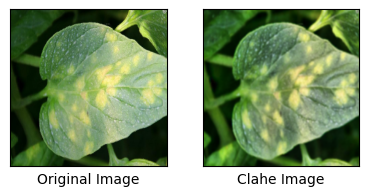

In [250]:
sample_container = [sample_bgr2rgb, sample_hsv2rgb]
sample_labels = ['Original Image', 'Clahe Image']

image_show(sample_container, sample_labels, 2, 2)